<a href="https://colab.research.google.com/github/Pranavjeet-Naidu/ForestFires_Turkey/blob/main/Forest_Fire_Turkey_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

df = pd.read_csv("Forest_Fires.csv")

<ipython-input-13-fa956583e4a7>:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Forest_Fires.csv")


In [14]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,38.9486,28.1108,308.5,1.0,1.0,2011-01-09,1113,Aqua,MODIS,67,6.03,283.8,10.3,D,0.0
1,38.9397,28.1130,309.6,1.0,1.0,2011-01-09,1113,Aqua,MODIS,69,6.03,283.2,11.2,D,0.0
2,36.7379,36.2091,301.7,1.1,1.0,2011-01-10,838,Terra,MODIS,37,6.03,289.2,5.9,D,2.0
3,37.9369,29.0612,304.2,3.3,1.7,2011-01-10,1156,Aqua,MODIS,58,6.03,286.9,36.4,D,0.0
4,37.9398,29.0685,303.4,3.3,1.7,2011-01-10,1156,Aqua,MODIS,56,6.03,286.9,35.9,D,0.0


Converting a Column to Date Format

#Step 1: Data Understanding

In [15]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,38.9486,28.1108,308.5,1.0,1.0,2011-01-09,1113,Aqua,MODIS,67,6.03,283.8,10.3,D,0.0
1,38.9397,28.1130,309.6,1.0,1.0,2011-01-09,1113,Aqua,MODIS,69,6.03,283.2,11.2,D,0.0
2,36.7379,36.2091,301.7,1.1,1.0,2011-01-10,838,Terra,MODIS,37,6.03,289.2,5.9,D,2.0
3,37.9369,29.0612,304.2,3.3,1.7,2011-01-10,1156,Aqua,MODIS,58,6.03,286.9,36.4,D,0.0
4,37.9398,29.0685,303.4,3.3,1.7,2011-01-10,1156,Aqua,MODIS,56,6.03,286.9,35.9,D,0.0


In [16]:
df.shape

(116782, 15)

In [17]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [18]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,type
count,116782.000000,116782.000000,116782.000000,116782.000000,116782.000000,116782.000000,116782.000000,116782.000000,116782.000000,111391.000000
mean,38.051413,36.140310,322.647599,1.516496,1.182351,1131.627126,66.240028,301.893506,31.005696,0.132641
std,1.243385,4.332015,16.174763,0.735798,0.228715,425.906190,19.549338,10.288274,75.642954,0.499063
min,35.822100,25.723600,300.000000,1.000000,1.000000,0.000000,0.000000,266.500000,0.000000,0.000000
25%,37.117800,33.194450,310.200000,1.000000,1.000000,850.000000,54.000000,293.400000,8.800000,0.000000
50%,37.635650,36.149100,321.400000,1.200000,1.100000,1029.000000,67.000000,301.900000,15.000000,0.000000
75%,38.740800,40.098200,331.000000,1.700000,1.300000,1110.000000,79.000000,309.600000,30.300000,0.000000
max,42.025500,44.796700,503.530000,4.820000,2.000000,2357.000000,100.000000,400.100000,4816.680000,3.000000


In [19]:
df.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version        object
bright_t31    float64
frp           float64
daynight       object
type          float64
dtype: object

In [20]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,38.9486,28.1108,308.5,1.0,1.0,2011-01-09,1113,Aqua,MODIS,67,6.03,283.8,10.3,D,0.0
1,38.9397,28.1130,309.6,1.0,1.0,2011-01-09,1113,Aqua,MODIS,69,6.03,283.2,11.2,D,0.0
2,36.7379,36.2091,301.7,1.1,1.0,2011-01-10,838,Terra,MODIS,37,6.03,289.2,5.9,D,2.0
3,37.9369,29.0612,304.2,3.3,1.7,2011-01-10,1156,Aqua,MODIS,58,6.03,286.9,36.4,D,0.0
4,37.9398,29.0685,303.4,3.3,1.7,2011-01-10,1156,Aqua,MODIS,56,6.03,286.9,35.9,D,0.0


In [21]:
df.info

<bound method DataFrame.info of         latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0       38.94860   28.11080      308.50  1.00   1.00  2011-01-09      1113   
1       38.93970   28.11300      309.60  1.00   1.00  2011-01-09      1113   
2       36.73790   36.20910      301.70  1.10   1.00  2011-01-10       838   
3       37.93690   29.06120      304.20  3.30   1.70  2011-01-10      1156   
4       37.93980   29.06850      303.40  3.30   1.70  2011-01-10      1156   
...          ...        ...         ...   ...    ...         ...       ...   
116777  37.30414   43.69511      330.30  1.02   1.01  2021-08-10      1011   
116778  37.05791   27.28960      327.24  1.96   1.37  2021-08-10      1149   
116779  38.64441   27.08695      341.95  2.00   1.38  2021-08-10      1149   
116780  37.05018   28.84606      342.40  2.48   1.52  2021-08-10      1149   
116781  37.05605   27.26775      371.20  1.96   1.37  2021-08-10      1149   

       satellite instrument  confidence version  bright_t31     frp daynight  \
0           Aqua      MODIS          67    6.03      283.80   10.30        D   
1           Aqua      MODIS          69    6.03      283.20   11.20        D   
2          Terra      MODIS          37    6.03      289.20    5.90        D   
3           Aqua      MODIS          58    6.03      286.90   36.40        D   
4           Aqua      MODIS          56    6.03      286.90   35.90        D   
...          ...        ...         ...     ...         ...     ...      ...   
116777      Aqua      MODIS          38  6.1NRT      317.58   10.66        D   
116778      Aqua      MODIS          74  6.1NRT      310.40   28.20        D   
116779      Aqua      MODIS          88  6.1NRT      310.96   86.83        D   
116780      Aqua      MODIS          90  6.1NRT      306.95  142.05        D   
116781      Aqua      MODIS          75  6.1NRT      313.86  280.96        D   

        type  
0        0.0  
1        0.0  
2        2.0  
3        0.0  
4        0.0  
...      ...  
116777   NaN  
116778   NaN  
116779   NaN  
116780   NaN  
116781   NaN  

[116782 rows x 15 columns]>

#Step 2 : Data Preperation

In [22]:
df[['Year','Month','Day']]=df['acq_date'].str.split("-", expand = True)
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df=df.loc[df['Year']>2015].reset_index(drop=True).copy()

In [23]:
df.isnull().sum()

latitude         0
longitude        0
brightness       0
scan             0
track            0
acq_date         0
acq_time         0
satellite        0
instrument       0
confidence       0
version          0
bright_t31       0
frp              0
daynight         0
type          5391
Year             0
Month            0
Day              0
dtype: int64

Only the type of area of the forest fire has null values

In [24]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,Year,Month,Day
0,36.6401,35.3135,371.7,1.0,1.0,2016-01-01,833,Terra,MODIS,100,6.03,266.5,0.0,D,0.0,2016,1,01
1,36.2777,29.3074,322.3,1.6,1.3,2016-01-01,834,Terra,MODIS,57,6.03,281.1,49.5,D,0.0,2016,1,01
2,36.9389,36.0609,302.4,1.0,1.0,2016-01-01,1937,Terra,MODIS,49,6.03,272.8,10.6,N,0.0,2016,1,01
3,36.8109,36.1862,321.7,1.3,1.1,2016-01-01,2351,Aqua,MODIS,100,6.03,283.6,31.3,N,3.0,2016,1,01
4,38.1838,29.9124,302.8,1.4,1.2,2016-01-02,916,Terra,MODIS,54,6.03,276.6,14.9,D,0.0,2016,1,02


<Axes: >

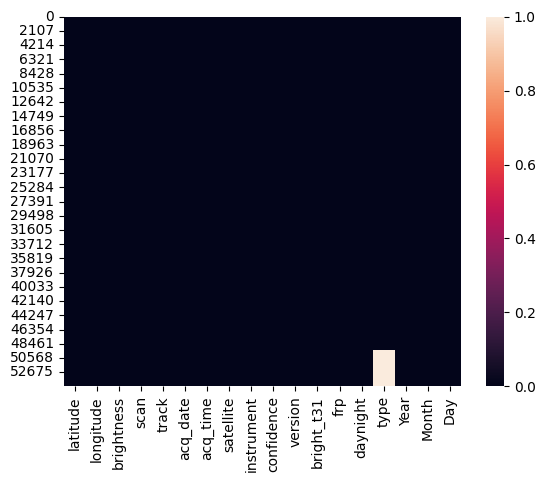

In [25]:
sns.heatmap(df.isnull())

In [26]:
df.loc[df.duplicated()]

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,Year,Month,Day


<Axes: xlabel='Year'>

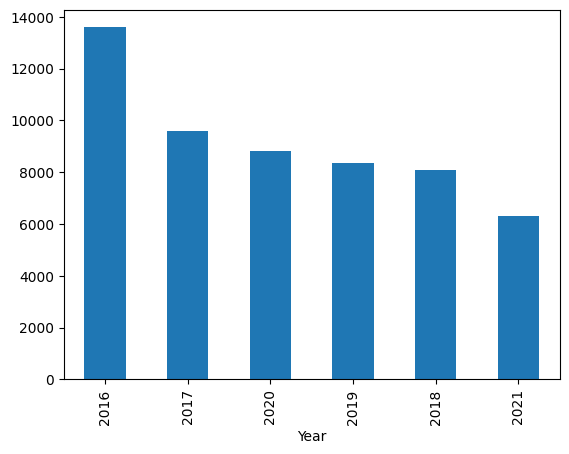

In [27]:
df['Year'].value_counts().plot(kind='bar')

In [28]:
Year_count=df.groupby('Year').value_counts(subset=['Month'])
print(Year_count)

Year  Month
2016  6        2517
      9        2466
      11       2187
      10       2150
      8        2113
               ... 
2021  1         442
      5         400
      2         348
      3         131
      4         128
Name: count, Length: 68, dtype: int64


[Text(0.5, 0, 'Time Period'), Text(0, 0.5, 'Number of Forest Fires')]

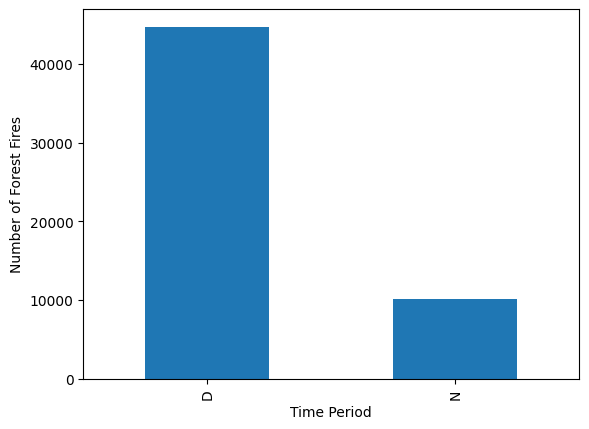

In [29]:
ax=df['daynight'].value_counts().plot(kind='bar')
ax.set(xlabel="x label", ylabel="y label")
ax.set(xlabel="Time Period", ylabel="Number of Forest Fires")

In [30]:
df['brightness'].value_counts()

brightness
307.20    201
328.70    188
306.80    181
328.50    174
305.10    173
         ... 
361.33      1
365.32      1
408.66      1
366.99      1
327.78      1
Name: count, Length: 3148, dtype: int64

In [31]:
df.head()
x_test=df.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

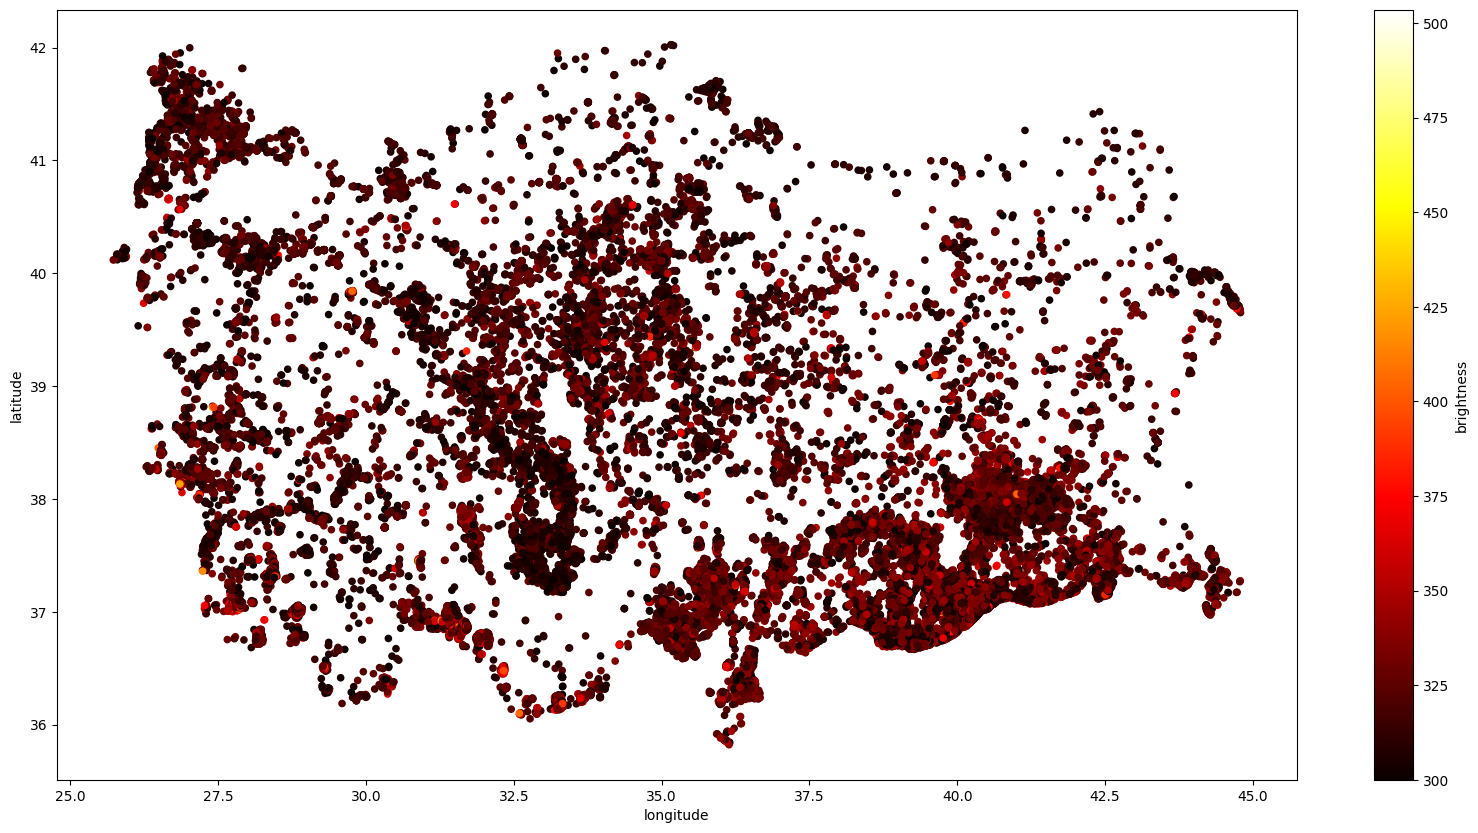

In [32]:
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness",colormap="hot",
        figsize=(20, 10))


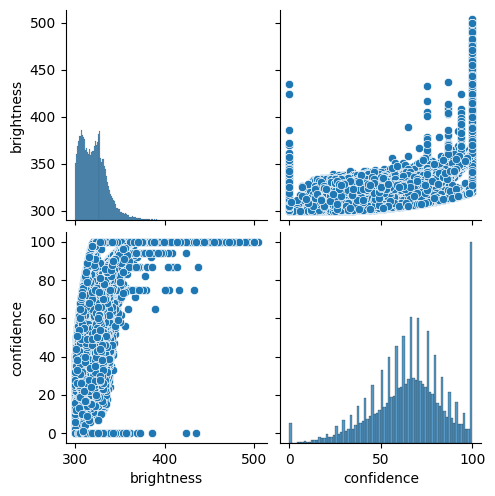

In [33]:
sns.pairplot(df,vars=['brightness','confidence',])


In [34]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,Year,Month,Day
0,36.6401,35.3135,371.7,1.0,1.0,2016-01-01,833,Terra,MODIS,100,6.03,266.5,0.0,D,0.0,2016,1,01
1,36.2777,29.3074,322.3,1.6,1.3,2016-01-01,834,Terra,MODIS,57,6.03,281.1,49.5,D,0.0,2016,1,01
2,36.9389,36.0609,302.4,1.0,1.0,2016-01-01,1937,Terra,MODIS,49,6.03,272.8,10.6,N,0.0,2016,1,01
3,36.8109,36.1862,321.7,1.3,1.1,2016-01-01,2351,Aqua,MODIS,100,6.03,283.6,31.3,N,3.0,2016,1,01
4,38.1838,29.9124,302.8,1.4,1.2,2016-01-02,916,Terra,MODIS,54,6.03,276.6,14.9,D,0.0,2016,1,02


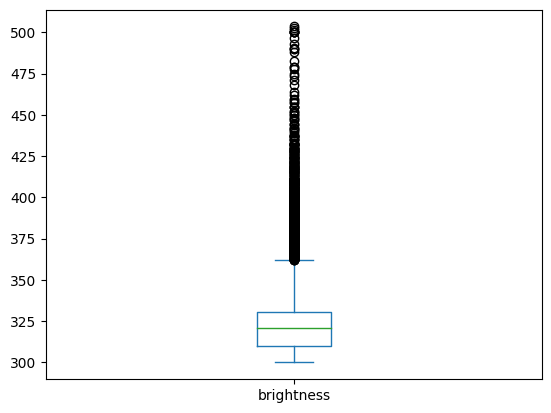

In [35]:
lol=df['brightness'].plot(kind="box")

In [36]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,Year,Month,Day
0,36.6401,35.3135,371.7,1.0,1.0,2016-01-01,833,Terra,MODIS,100,6.03,266.5,0.0,D,0.0,2016,1,01
1,36.2777,29.3074,322.3,1.6,1.3,2016-01-01,834,Terra,MODIS,57,6.03,281.1,49.5,D,0.0,2016,1,01
2,36.9389,36.0609,302.4,1.0,1.0,2016-01-01,1937,Terra,MODIS,49,6.03,272.8,10.6,N,0.0,2016,1,01
3,36.8109,36.1862,321.7,1.3,1.1,2016-01-01,2351,Aqua,MODIS,100,6.03,283.6,31.3,N,3.0,2016,1,01
4,38.1838,29.9124,302.8,1.4,1.2,2016-01-02,916,Terra,MODIS,54,6.03,276.6,14.9,D,0.0,2016,1,02


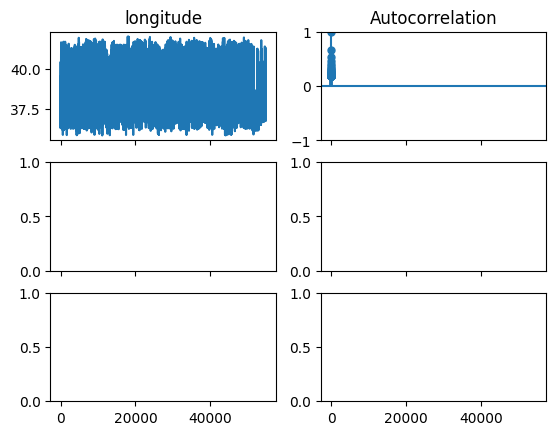

In [37]:
fig, axes = plt.subplots(3, 2, sharex = True)
axes[0, 0].plot(df['latitude'])
axes[0, 0].set_title('longitude')
plot_acf(df['latitude'], ax=axes[0,1]);

# Step 3 : Modelling

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('Year', axis=1)  # Features (independent variables)
y = df['brightness']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train23, X_test23, y_train23, y_test23 = train_test_split(X, y, test_size=0.33, random_state=42)

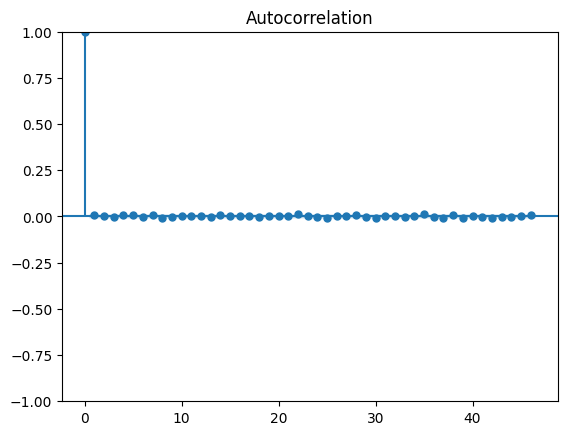

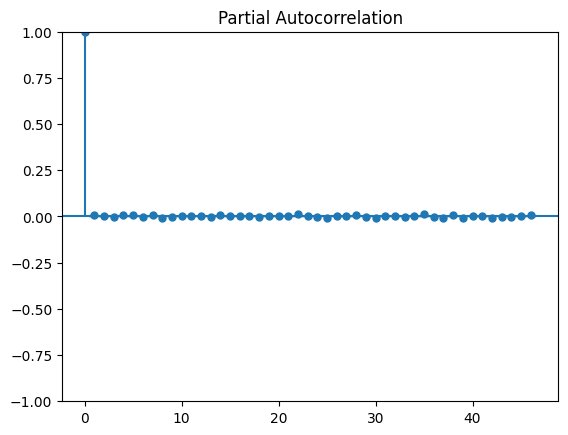

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
# Prepare the data
dates = pd.to_datetime(X_train23['acq_date'])
values =y_train23
series = pd.Series(values.values, index=dates)

# Determine the optimal values for p and q using ACF and PACF plots
plot_acf(series)
plt.show()

plot_pacf(series)
plt.show()

# Grid search to find the optimal values for p, d, and q
best_aic = np.inf
best_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(series, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue
print(f"Optimal (p, d, q) values: {best_order}")

In [ ]:
import itertools
p_values = range(0, 3)  # Adjust as needed
d_values = range(0, 2)  # Adjust as needed
q_values = range(0, 3)  # Adjust as needed

best_aic = float("inf")
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(data, order=(p, d, q))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
    except:
        continue

print("Best (p, d, q):", best_order)


In [ ]:
print(len(X_train23))
print(len(X_test23))
print(len(y_train23))
print(len(y_test23))

# Arima

In [ ]:
# Prepare the data
dates = pd.to_datetime(x_test['acq_date'])
values =x_test['brightness']
series = pd.Series(values.values, index=dates)

# Fit the ARIMA model
order = (1, 0, 1)

model = ARIMA(y, order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()
# Forecast the next 30 values
forecast = model_fit.forecast(steps=18074)


# Print the forecasted values
print(forecast)

In [ ]:
mae = mean_absolute_error(y_test23,forecast)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test23,forecast) * 100
print("MAPE:", mape)


In [ ]:
# Concatenate X_train and y_train along the columns (axis=1)
df_train = pd.concat([X_train23, y_train23], axis=1)

In [ ]:
df_test=pd.concat([ X_test23,y_test23], axis=1)

# Holt Winters

In [ ]:
#create a simple synthetic time series
np.random.seed(0)
data = np.random.randn(100)
date_rng = pd.date_range(start='2020-01-01', periods=100, freq='D')
ts = pd.Series(data, index=date_rng)

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title("forestFires")
plt.xlabel("acq_date")
plt.ylabel("brightness")
plt.show()

# Fit a Holt-Winters model to the time series
model = sm.tsa.ExponentialSmoothing(ts, trend="add", seasonal="add", seasonal_periods=12)
results = model.fit()

# Print a summary of the Holt-Winters model
print(results.summary())

# Plot the Holt-Winters model's forecast
forecast = results.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Holt-Winters Forecast")
plt.xlabel("acq_date")
plt.ylabel("brightness")
plt.legend()
plt.show()


In [ ]:
actual_values = y_test23 # Provide the actual values for the forecasted time periods
mae = abs(forecast -y_test23).mean()
mape = (abs(forecast - y_test23) / abs(actual_values)).mean() * 100

print(mae)
print(mape)


In [ ]:
print(forecast.dtype)
print(y_test23.dtype)


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error, r2_score

# Rename the columns to 'ds' and 'y' for the time series data and target variable
#dftrainnew = dftrainnew.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
dftrain = df.rename(columns={'acq_date': 'ds', 'brightness':'y'})
# Initialize the Prophet model
model = Prophet(yearly_seasonality=True)
model.add_seasonality(name='Yearly', period=52, fourier_order=7)

# Fit the model to the data
model.fit(dftrain)

# Make predictions
forecast = model.predict()

actual_values = dftrain['y'].values
predicted_values = forecast['yhat'].values

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])